# Fischer 2020 Model

CCSN neutrino model from Tobias Fischer

The citation is: *Neutrino signal from proto-neutron star evolution: Effects of opacities from charged-current-neutrino interactions and inverse neutron decay*, Fischer, Tobias ; Guo, Gang ; Dzhioev, Alan A. ; Martínez-Pinedo, Gabriel ; Wu, Meng-Ru ; Lohs, Andreas ; Qian, Yong-Zhong, Physical Review C, Volume 101, Issue 2, article id.025804 (https://ui.adsabs.harvard.edu/link_gateway/2020PhRvC.101b5804F/doi:10.1103/PhysRevC.101.025804), [arXiv:1804.10890](https://arxiv.org/abs/1804.10890).

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from astropy import units as u 
from snewpy.neutrino import Flavor
from snewpy.models.ccsn import Fischer_2020
from snewpy.flavor_transformation import NoTransformation, AdiabaticMSW, ThreeFlavorDecoherence

mpl.rc('font', size=16)
%matplotlib inline

## Initialize Models

To start, let’s see what progenitors are available for the `Fischer_2020` model. We can use the `param` property to view all physics parameters and their possible values:

In [6]:
Fischer_2020.param

{'progenitor_mass': [<Quantity 18. solMass>], 'eos': ['HS(DD2)']}

If this is the first time you’re using a progenitor, snewpy will automatically download the required data files for you.

In [7]:
#F2020 = Fischer_2020(progenitor_mass=18*u.Msun, eos='HS(DD2)')
F2020 = Fischer_2020()

F2020

**Fischer_2020 Model**

|Parameter|Value|
|:--------|:----:|
|Progenitor mass | $18$ $\mathrm{M_{\odot}}$|
|EOS | HS(DD2) |

Plot the luminosity of different neutrino flavors for this model. 

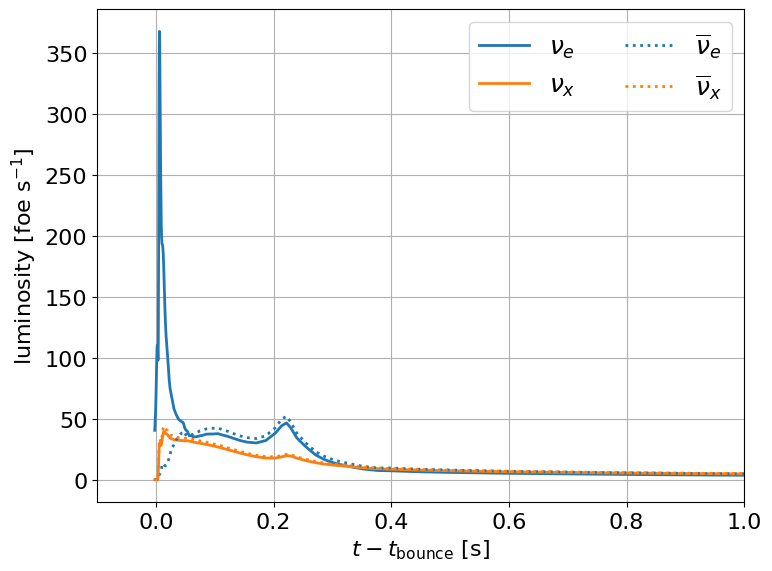

In [9]:
fig, ax = plt.subplots(1, figsize=(8, 6), tight_layout=False)

for flavor in Flavor:
    if flavor.is_electron == True:
        color='C0'
    else:
        color='C1'
    ls='-' if flavor.is_neutrino else ':'
    lw = 2
    
    ax.plot(F2020.time, F2020.luminosity[flavor]/1e51,  # Report luminosity in units foe/s
            label=flavor.to_tex(), color=color, ls=ls, lw=lw)
    
ax.set(xlim=(-0.1, 1), xlabel=r'$t-t_{\rm bounce}$ [s]')
ax.grid()
ax.legend(loc='upper right', ncol=2, fontsize=18)
ax.set(ylabel=r'luminosity [foe s$^{-1}$]');

## Initial and Oscillated Spectra

Plot the neutrino spectra at the source and after the requested flavor transformation has been applied.

### Adiabatic MSW Flavor Transformation: Normal mass ordering

In [11]:
# Adiabatic MSW effect. NMO is used by default.
xform_nmo = AdiabaticMSW()

# Energy array and time to compute spectra.
# Note that any convenient units can be used and the calculation will remain internally consistent.
E = np.linspace(0,100,201) * u.MeV
t = 50*u.ms

ispec = F2020.get_initial_spectra(t, E)
ospec_nmo = F2020.get_transformed_spectra(t, E, xform_nmo)

NameError: name 'ThreeFlavor' is not defined

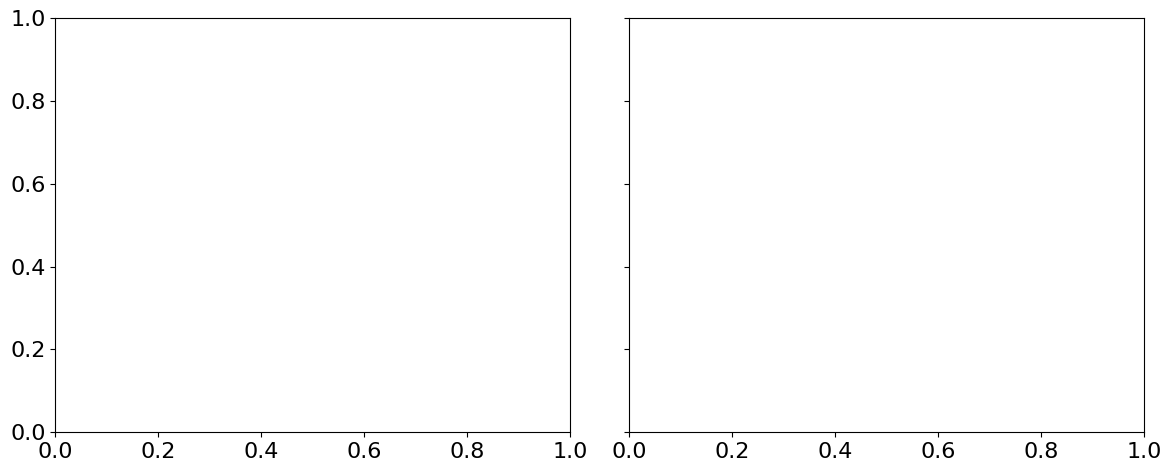

In [12]:
fig, axes = plt.subplots(1,2, figsize=(12,5), sharex=True, sharey=True, tight_layout=True)

for i, spec in enumerate([ispec, ospec_nmo]):
    ax = axes[i]
    for flavor in Flavor:
        if flavor.is_electron == True:
            color='C0'
        elif flavor.is_muon == True:
            color='C1'    
        else:
            color='C1'
        ax.plot(E, spec[flavor],
                label=flavor.to_tex(),
                color=color,
                ls='-' if flavor.is_neutrino else ':', lw=2,
                alpha=0.7)

    ax.set(xlabel=r'$E$ [{}]'.format(E.unit),
           title='Initial Spectra: $t = ${:.1f}'.format(t) if i==0 else 'Oscillated Spectra: $t = ${:.1f}'.format(t))
    ax.grid()
    ax.legend(loc='upper right', ncol=2, fontsize=16)

ax = axes[0]
ax.set(ylabel=r'flux [erg$^{-1}$ s$^{-1}$]')

fig.tight_layout();